In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt 
%matplotlib inline

import math
from scipy import stats

from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore') 

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score

from sklearn.metrics import confusion_matrix


In [2]:
reviews_df = pd.read_csv('clothing_reviews_clean.csv')

In [3]:
reviews_df.head()

,Unnamed: 0,review,recommended,length,polarity,lower,no_punc,no_stop,no_num,words_removed,token,pos_tags,lemmatized,joined
0,0,Absolutely wonderful - silky and sexy and comf...,1,53,0.633333,absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky and sexy and comfo...,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable,"['absolutely', 'wonderful', 'silky', 'sexy', '...","[('absolutely', 'RB'), ('wonderful', 'JJ'), ('...","['absolutely', 'wonderful', 'silky', 'sexy', '...",absolutely wonderful silky sexy comfortable
1,1,Love this dress! it's sooo pretty. i happene...,1,303,0.339583,love this dress! it's sooo pretty. i happened ...,love this dress its sooo pretty i happened to ...,love dress sooo pretty happened find store im ...,love dress sooo pretty happened find store im ...,love sooo pretty happened find store glad bc n...,"['love', 'sooo', 'pretty', 'happened', 'find',...","[('love', 'VB'), ('sooo', 'NN'), ('pretty', 'R...","['love', 'sooo', 'pretty', 'happen', 'find', '...",love sooo pretty happen find store glad bc nev...
2,2,I had such high hopes for this dress and reall...,0,500,0.073675,i had such high hopes for this dress and reall...,i had such high hopes for this dress and reall...,high hopes dress really wanted work initially ...,high hopes dress really wanted work initially ...,high hopes really wanted work initially ordere...,"['high', 'hopes', 'really', 'wanted', 'work', ...","[('high', 'JJ'), ('hopes', 'NNS'), ('really', ...","['high', 'hope', 'really', 'want', 'work', 'in...",high hope really want work initially order pet...
3,3,"I love, love, love this jumpsuit. it's fun, fl...",1,124,0.550000,"i love, love, love this jumpsuit. it's fun, fl...",i love love love this jumpsuit its fun flirty ...,love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirty fabulous ev...,"['love', 'love', 'love', 'jumpsuit', 'fun', 'f...","[('love', 'VB'), ('love', 'NN'), ('love', 'NN'...","['love', 'love', 'love', 'jumpsuit', 'fun', 'f...",love love love jumpsuit fun flirty fabulous ev...
4,4,This shirt is very flattering to all due to th...,1,192,0.512891,this shirt is very flattering to all due to th...,this shirt is very flattering to all due to th...,shirt flattering due adjustable front tie perf...,shirt flattering due adjustable front tie perf...,flattering due adjustable front tie perfect le...,"['flattering', 'due', 'adjustable', 'front', '...","[('flattering', 'VBG'), ('due', 'JJ'), ('adjus...","['flatter', 'due', 'adjustable', 'front', 'tie...",flatter due adjustable front tie perfect lengt...


In [4]:
reviews_df['recommended'].value_counts()

1    18540
0     4101
Name: recommended, dtype: int64

In [5]:
analysis_df = reviews_df[['recommended', 'lemmatized']]

In [6]:
analysis_df['recommended']

0        1
1        1
2        0
3        1
4        1
        ..
22636    1
22637    1
22638    0
22639    1
22640    1
Name: recommended, Length: 22641, dtype: int64

In [7]:
# Create two data frames for 'positive' and 'negative' words

pos_df = analysis_df[analysis_df['recommended'] == 1]
neg_df = analysis_df[analysis_df['recommended'] == 0]


In [8]:
pos_df.head()

,recommended,lemmatized
0,1,"['absolutely', 'wonderful', 'silky', 'sexy', '..."
1,1,"['love', 'sooo', 'pretty', 'happen', 'find', '..."
3,1,"['love', 'love', 'love', 'jumpsuit', 'fun', 'f..."
4,1,"['flatter', 'due', 'adjustable', 'front', 'tie..."
6,1,"['aded', 'basket', 'hte', 'last', 'mintue', 's..."


In [9]:
# Polarity of positive dataframe

pos_df['polarity'] = pos_df['lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)
pos_df.head(5)

,recommended,lemmatized,polarity
0,1,"['absolutely', 'wonderful', 'silky', 'sexy', '...",0.633333
1,1,"['love', 'sooo', 'pretty', 'happen', 'find', '...",0.318750
3,1,"['love', 'love', 'love', 'jumpsuit', 'fun', 'f...",0.500000
4,1,"['flatter', 'due', 'adjustable', 'front', 'tie...",0.458333
6,1,"['aded', 'basket', 'hte', 'last', 'mintue', 's...",0.075625


In [10]:
pos_df['polarity'].describe()

count    18540.000000
mean         0.267034
std          0.179089
min         -0.700000
25%          0.149148
50%          0.253244
75%          0.373469
max          1.000000
Name: polarity, dtype: float64

In [11]:
# Polarity of negative dataframe

neg_df['polarity'] = neg_df['lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)
neg_df.head(5)

,recommended,lemmatized,polarity
2,0,"['high', 'hope', 'really', 'want', 'work', 'in...",0.045530
5,0,"['love', 'tracy', 'reese', 'dress', 'petite', ...",0.106250
10,0,"['run', 'small', 'esp', 'zipper', 'area', 'run...",-0.078571
22,0,"['first', 'pullover', 'style', 'side', 'zipper...",-0.058095
25,0,"['love', 'didnt', 'really', 'long', 'purchase'...",0.207653


In [12]:
# The mean polarity of the 'negative' reviews was 0.1 (which actually is positive)
# The highest polarity on the negative dataframe is 0.9 which indicate that there might be a few positive reviews 
# which has been rated 'not recommended'

neg_df['polarity'].describe()

count    4101.000000
mean        0.115536
std         0.183357
min        -1.000000
25%         0.002500
50%         0.110897
75%         0.220635
max         0.900000
Name: polarity, dtype: float64

In [13]:
# Create two balanced samples for the analysis

pos_sample = pos_df.sample(4000)
neg_sample = neg_df.sample(4000)

In [14]:
pos_sample['polarity'].describe()

count    4000.000000
mean        0.268426
std         0.178669
min        -0.333333
25%         0.149256
50%         0.254056
75%         0.371317
max         1.000000
Name: polarity, dtype: float64

In [15]:
neg_sample['polarity'].describe()

count    4000.000000
mean        0.115380
std         0.183614
min        -1.000000
25%         0.002177
50%         0.110714
75%         0.221136
max         0.900000
Name: polarity, dtype: float64

# Hypothesis 1: 

H0: There is no significant difference in the mean polarity of the 'positive sample' and the mean polarity of all 'positive' reviews.

HA: There is significant difference in the mean polarity of the 'positive sample' and the mean polarity of all 'positive' reviews.

Since the variance of the population (the full positive sample) is known we will use a Z-test.

Rejection Region for Two-Tailed Z Test (H0: μ ≠ μ 0 ) with α =0.05. 
The decision rule is: Reject H0 if Z < -1.960 or if Z > 1.960.


In [16]:
p_n = 4000
p_pop_mean = 0.267034
p_sample_mean = 0.270990
p_pop_std = 0.178884

p_statistic = (p_sample_mean - p_pop_mean) / (p_pop_std / math.sqrt(p_n))

In [17]:
print('The Z statistic is: ', p_statistic)

The Z statistic is:  1.3986684581769366


Since 1.39 < 1.96 we do not reject the null hypothesis at 95% significance. 


# Hypothesis 2: 

H0: There is no significant difference in the mean polarity of the 'negative sample' and the mean polarity of all 'negative' reviews.

HA: There is significant difference in the mean polarity of the 'negative sample' and the mean polarity of all 'negative' reviews.

The decision rule is: Reject H0 if Z < -1.960 or if Z > 1.960.

In [18]:
n_n = 4000
n_pop_mean = 0.115536
n_sample_mean = 0.115348
n_pop_std = 0.183100

n_statistic = (n_sample_mean - n_pop_mean) / (n_pop_std / math.sqrt(n_n))

In [19]:
print('The Z statistic is: ', n_statistic)

The Z statistic is:  -0.06493808848843642


Since -0.06 > -1.96 we do not reject the null hypothesis at 95% significance. 


In [20]:
# Since there is no significant difference in the polarity we can assume that the samples are representative

# Create a new dataframe including both samples

new_df = pd.concat([pos_sample, neg_sample])

In [21]:
new_df = new_df.reset_index(drop = True)

In [22]:
new_df

,recommended,lemmatized,polarity
0,1,"['order', 'xl', 'perfect', 'drape', 'flatterin...",0.523611
1,1,"['look', 'great', 'give', 'slender', 'appearan...",0.544444
2,1,"['tie', 'two', 'different', 'material', 'soft'...",0.150000
3,1,"['gorgeous', 'absolutely', 'stunning', 'look',...",0.223852
4,1,"['yearold', 'daughter', 'fell', 'love', 'saw',...",0.166667
...,...,...,...
7995,0,"['extremely', 'disappointed', 'arrive', 'nothi...",-0.245476
7996,0,"['cute', 'seem', 'high', 'quality', 'love', 'k...",0.290000
7997,0,"['texture', 'didnt', 'meet', 'expectation', 'u...",0.050000
7998,0,"['lovely', 'cut', 'pretty', 'creamy', 'great',...",0.271795


In [23]:
X = new_df['lemmatized']
y = new_df['recommended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
X_train

1001    ['love', 'asymmetrical', 'zipper', 'soft', 'co...
7360    ['like', 'allbut', 'look', 'prior', 'purchasin...
5234    ['want', 'love', 'excite', 'ordered', 'online'...
7390    ['adorable', 'love', 'lace', 'detail', 'side',...
6841    ['curvy', 'stylish', 'love', 'pocket', 'didnt'...
                              ...                        
4931    ['head', 'romper', 'pant', 'cant', 'tell', 'pi...
3264    ['feel', 'hang', 'nicely', 'versatile', 'purch...
1653    ['ordered', 'neutral', 'p', 'hem', 'lb', 'wear...
2607    ['buy', 'dress', 'online', 'attempt', 'find', ...
2732    ['month', 'post', 'baby', 'still', 'body', 'se...
Name: lemmatized, Length: 6400, dtype: object

In [25]:
X_test

3069    ['tried', 'fluke', 'work', 'retailer', 'like',...
1675    ['love', 'get', 'blue', 'color', 'deep', 'beau...
6385    ['love', 'tracy', 'reese', 'dress', 'petite', ...
543     ['hard', 'time', 'find', 'slack', 'step', 'gre...
3213    ['love', 'charlie', 'trouser', 'must', 'pair',...
                              ...                        
7716    ['much', 'buy', 'retailer', 'first', 'review',...
4766    ['design', 'nice', 'texture', 'feel', 'comfort...
4096    ['much', 'potential', 'love', 'pattern', 'neck...
1595    ['agree', 'good', 'review', 'love', 'feel', 'v...
5023    ['particularly', 'large', 'thigh', 'pair', 'pa...
Name: lemmatized, Length: 1600, dtype: object

In [26]:
y_train

1001    1
7360    0
5234    0
7390    0
6841    0
       ..
4931    0
3264    1
1653    1
2607    1
2732    1
Name: recommended, Length: 6400, dtype: int64

In [27]:
y_test

3069    1
1675    1
6385    0
543     1
3213    1
       ..
7716    0
4766    0
4096    0
1595    1
5023    0
Name: recommended, Length: 1600, dtype: int64

# Naive Bayes (Multinomial)

In [29]:
# I create a model pipeline including the vectorizer, TfidfTransformer and classifier

model_nb = Pipeline([('vect', CountVectorizer(min_df = 5, ngram_range = (1,2))),     # ignore terms that have a document frequency lower than 5
                   ('tfidf', TfidfTransformer()),                                    # include unigrams and bigrams
                   ('clf', MultinomialNB()),
                   ])

model_nb.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = model_nb.predict(X_test)

In [30]:
print('The model accuracy is %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

The model accuracy is 0.863125
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       790
           1       0.88      0.85      0.86       810

    accuracy                           0.86      1600
   macro avg       0.86      0.86      0.86      1600
weighted avg       0.86      0.86      0.86      1600



In [47]:
print(confusion_matrix(ytest, pred_y))

[[653 137]
 [129 681]]


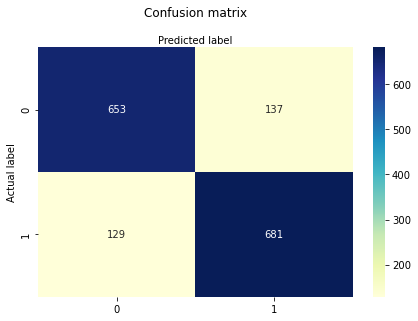

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np

cnf_matrix = metrics.confusion_matrix(ytest, pred_y)
cnf_matrix
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu" ,fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

We will compare the results from the Multinomial Naive Bayes model with some other common models

# Logistic Regression

In [49]:
model_lr = Pipeline([('vect', CountVectorizer(min_df = 5, ngram_range = (1,2))),
                   ('tfidf', TfidfTransformer()),
                   ('clf', LogisticRegression()),
                   ])

model_lr.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = model_lr.predict(X_test)

In [50]:
print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 0.861875
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       790
           1       0.86      0.86      0.86       810

    accuracy                           0.86      1600
   macro avg       0.86      0.86      0.86      1600
weighted avg       0.86      0.86      0.86      1600



In [51]:
print(confusion_matrix(ytest, pred_y))

[[680 110]
 [111 699]]


# DecisionTree

In [52]:
model_dt = Pipeline([('vect', CountVectorizer(min_df = 5, ngram_range = (1,2))),
                   ('tfidf', TfidfTransformer()),
                   ('clf', DecisionTreeClassifier()),
                   ])

model_dt.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = model_dt.predict(X_test)

In [53]:
print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 0.741875
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       790
           1       0.74      0.76      0.75       810

    accuracy                           0.74      1600
   macro avg       0.74      0.74      0.74      1600
weighted avg       0.74      0.74      0.74      1600



In [54]:
print(confusion_matrix(ytest, pred_y))

[[568 222]
 [191 619]]


# Random Forest

In [55]:
model_rf = Pipeline([('vect', CountVectorizer(min_df = 5, ngram_range = (1,2))),
                   ('tfidf', TfidfTransformer()),
                   ('clf', RandomForestClassifier()),
                   ])

model_rf.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = model_rf.predict(X_test)

In [56]:
print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 0.844375
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       790
           1       0.84      0.85      0.85       810

    accuracy                           0.84      1600
   macro avg       0.84      0.84      0.84      1600
weighted avg       0.84      0.84      0.84      1600



In [57]:
print(confusion_matrix(ytest, pred_y))

[[659 131]
 [118 692]]


# Support Vector Machines (SVM)

In [60]:
model_svm = Pipeline([('vect', CountVectorizer(min_df = 5, ngram_range = (1,2))),
                   ('tfidf', TfidfTransformer()),
                   ('clf', svm.SVC()),
                   ])

model_svm.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = model_svm.predict(X_test)

In [61]:
print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 0.86125
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       790
           1       0.87      0.86      0.86       810

    accuracy                           0.86      1600
   macro avg       0.86      0.86      0.86      1600
weighted avg       0.86      0.86      0.86      1600



In [62]:
print(confusion_matrix(ytest, pred_y))

[[685 105]
 [117 693]]


Using the same test and train set, Naive Bayes, SVM and Logistic Regression all had an accuray of 86%. Followed by Random Forest at 84%. Decision Tree preformed worst at 74%.

This indicate that Naive Bayes is a good predictor of sentiment in reviews.